# NOTEBOOK EXPERIMENTS HOÀN CHỈNH
## Đồ án 1: Thuật toán Swarm Intelligence
### CSC14003 - Cơ sở Trí tuệ Nhân tạo

---

**Mục đích:** Chạy tất cả experiments và thu thập số liệu cho báo cáo

**Nội dung:**
1. Test tất cả 5 thuật toán Swarm Intelligence
2. So sánh với 3 thuật toán truyền thống
3. Test trên 4 hàm continuous optimization
4. Test trên bài toán TSP
5. Phân tích kết quả và tạo visualizations
6. Export kết quả ra file CSV

**Thời gian chạy ước tính:** ~30-45 phút (tùy máy)


## 1. Setup & Import Libraries


In [ ]:
# Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import time
import warnings
warnings.filterwarnings('ignore')

# Thêm path
sys.path.append('..')

# Import modules từ project
from src.test_functions import get_test_function
from src.swarm_intelligence import PSO, ACO, ABC, FireflyAlgorithm, CuckooSearch
from src.traditional_search import HillClimbing, SimulatedAnnealing, GeneticAlgorithm
from src.discrete_problems import TSP, TSPSolver
from src.comparison import AlgorithmComparison
from src.visualization import OptimizationVisualizer

# Set random seed để reproducible
np.random.seed(42)

# Configuration
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Import thành công!")
print(f"NumPy version: {np.__version__}")


✓ Import thành công!
NumPy version: 1.26.4


## 2. Cấu hình Experiments

Định nghĩa parameters cho experiments


In [ ]:
# Cấu hình experiments
CONFIG = {
    'dim': 10,                    # Số chiều cho continuous optimization
    'n_trials': 30,               # Số lần chạy mỗi thuật toán (để tính trung bình)
    'max_iter_swarm': 100,        # Số iterations cho swarm algorithms
    'max_iter_traditional': 1000, # Số iterations cho traditional algorithms
    'population_size': 30,        # Kích thước population/swarm
    'n_cities_tsp': 20,          # Số thành phố cho TSP
}

# Test functions
TEST_FUNCTIONS = ['sphere', 'rastrigin', 'rosenbrock', 'ackley']

print("Cấu hình Experiments:")
print("="*50)
for key, value in CONFIG.items():
    print(f"  {key:25s}: {value}")
print(f"  Test functions: {', '.join(TEST_FUNCTIONS)}")
print("="*50)


Cấu hình Experiments:
  dim                      : 10
  n_trials                 : 30
  max_iter_swarm           : 100
  max_iter_traditional     : 1000
  population_size          : 30
  n_cities_tsp             : 20
  Test functions: sphere, rastrigin, rosenbrock, ackley


## 3. Experiments trên Continuous Optimization

Chạy tất cả thuật toán trên 4 hàm test: Sphere, Rastrigin, Rosenbrock, Ackley


In [ ]:
# Dictionary để lưu tất cả kết quả
all_results = {}

# Tiến hành experiments cho mỗi test function
for func_name in TEST_FUNCTIONS:
    print(f"\n{'='*70}")
    print(f"TESTING ON: {func_name.upper()} FUNCTION")
    print('='*70)
    
    # Lấy test function
    func = get_test_function(func_name, dim=CONFIG['dim'])
    print(f"Dimension: {CONFIG['dim']}")
    print(f"Global optimum: {func.global_optimum}")
    print(f"Bounds: {func.bounds[0]}")
    
    # Định nghĩa thuật toán
    algorithms = {
        # Swarm Intelligence Algorithms
        'PSO': (PSO, {
            'n_particles': CONFIG['population_size'],
            'dim': CONFIG['dim'],
            'max_iter': CONFIG['max_iter_swarm'],
            'bounds': func.bounds
        }),
        'ACO': (ACO, {
            'n_ants': CONFIG['population_size'],
            'dim': CONFIG['dim'],
            'max_iter': CONFIG['max_iter_swarm'],
            'bounds': func.bounds
        }),
        'ABC': (ABC, {
            'n_bees': CONFIG['population_size'],
            'dim': CONFIG['dim'],
            'max_iter': CONFIG['max_iter_swarm'],
            'bounds': func.bounds
        }),
        'FA': (FireflyAlgorithm, {
            'n_fireflies': CONFIG['population_size'],
            'dim': CONFIG['dim'],
            'max_iter': CONFIG['max_iter_swarm'],
            'bounds': func.bounds
        }),
        'CS': (CuckooSearch, {
            'n_nests': CONFIG['population_size'],
            'dim': CONFIG['dim'],
            'max_iter': CONFIG['max_iter_swarm'],
            'bounds': func.bounds
        }),
        
        # Traditional Search Algorithms
        'Hill Climbing': (HillClimbing, {
            'dim': CONFIG['dim'],
            'max_iter': CONFIG['max_iter_traditional'],
            'bounds': func.bounds
        }),
        'Simulated Annealing': (SimulatedAnnealing, {
            'dim': CONFIG['dim'],
            'max_iter': CONFIG['max_iter_traditional'],
            'bounds': func.bounds
        }),
        'Genetic Algorithm': (GeneticAlgorithm, {
            'population_size': 50,
            'dim': CONFIG['dim'],
            'max_iter': CONFIG['max_iter_swarm'],
            'bounds': func.bounds
        })
    }
    
    print(f"\nChạy {len(algorithms)} thuật toán với {CONFIG['n_trials']} trials mỗi thuật toán...")
    print("(Có thể mất vài phút...)\n")
    
    # Chạy comparison
    results = AlgorithmComparison.compare_algorithms(
        algorithms,
        func,
        n_trials=CONFIG['n_trials'],
        verbose=False
    )
    
    # Lưu kết quả
    all_results[func_name] = results
    
    # In tóm tắt
    print(f"\n✓ Hoàn thành {func_name.upper()}")
    df = AlgorithmComparison.create_comparison_table(results)
    print("\nBảng kết quả:")
    print(df.to_string(index=False))
    print()

print("\n" + "="*70)
print("✓ HOÀN THÀNH TẤT CẢ CONTINUOUS OPTIMIZATION EXPERIMENTS")
print("="*70)



TESTING ON: SPHERE FUNCTION
Dimension: 10
Global optimum: 0
Bounds: [-100  100]

Chạy 8 thuật toán với 30 trials mỗi thuật toán...
(Có thể mất vài phút...)


Running PSO...


Running trials: 100%|██████████| 30/30 [00:00<00:00, 33.28it/s]



Running ACO...


Running trials: 100%|██████████| 30/30 [01:41<00:00,  3.39s/it]



Running ABC...


Running trials: 100%|██████████| 30/30 [00:07<00:00,  4.01it/s]



Running FA...


Running trials: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]



Running CS...


Running trials: 100%|██████████| 30/30 [00:03<00:00,  8.49it/s]



Running Hill Climbing...


Running trials: 100%|██████████| 30/30 [00:05<00:00,  5.69it/s]



Running Simulated Annealing...


Running trials: 100%|██████████| 30/30 [00:00<00:00, 279.92it/s]



Running Genetic Algorithm...


Running trials: 100%|██████████| 30/30 [00:04<00:00,  6.56it/s]



✓ Hoàn thành SPHERE

Bảng kết quả:
          Algorithm   Mean Score   Std Score   Min Score    Max Score  Median Score  Mean Time (s)  Std Time (s)
                PSO     0.010006    0.006837    0.001836     0.028767      0.008833       0.029787      0.011122
                ACO     0.274164    0.170531    0.106625     0.816204      0.223033       3.384112      0.420642
  Genetic Algorithm     9.895806    6.986785    2.321694    31.301524      7.618753       0.151291      0.007174
                ABC    25.983334   18.983006    4.860262    81.357568     17.853184       0.248053      0.027600
                 CS  5155.873313 2602.582866 1541.584754 11574.564949   4372.057147       0.116844      0.005961
Simulated Annealing 10217.421207 4981.129888 2411.758860 20318.844516  10673.021374       0.003521      0.001405
                 FA 16919.397728 3435.291081 7824.183731 22980.341871  16531.236816       1.055784      0.050627
      Hill Climbing 19233.529215 6962.640389 8160.050881 361

Running trials: 100%|██████████| 30/30 [00:00<00:00, 35.14it/s]



Running ACO...


Running trials: 100%|██████████| 30/30 [02:27<00:00,  4.91s/it]



Running ABC...


Running trials: 100%|██████████| 30/30 [00:36<00:00,  1.20s/it]



Running FA...


Running trials: 100%|██████████| 30/30 [01:59<00:00,  3.98s/it]



Running CS...


Running trials: 100%|██████████| 30/30 [00:04<00:00,  7.11it/s]



Running Hill Climbing...


Running trials: 100%|██████████| 30/30 [00:07<00:00,  3.89it/s]



Running Simulated Annealing...


Running trials: 100%|██████████| 30/30 [00:00<00:00, 234.22it/s]



Running Genetic Algorithm...


Running trials: 100%|██████████| 30/30 [00:05<00:00,  5.66it/s]



✓ Hoàn thành RASTRIGIN

Bảng kết quả:
          Algorithm  Mean Score  Std Score  Min Score  Max Score  Median Score  Mean Time (s)  Std Time (s)
  Genetic Algorithm    6.639396   2.625321   2.632458  13.161359      6.038909       0.175057      0.008734
                PSO   14.866833   7.858867   5.318081  41.608540     13.010762       0.028232      0.002758
                 CS   37.454794  14.159564  13.018353  57.940166     39.071196       0.139498      0.028320
                ACO   46.679072   7.246659  29.880253  60.518020     46.738491       4.912829      2.857127
                ABC   49.335285   6.786363  33.731458  63.636787     48.486352       1.199115      0.157812
                 FA   66.752962   8.098705  50.458414  82.484392     65.920758       3.974714      2.001812
      Hill Climbing   81.121801  20.269883  34.823446 115.414522     84.570902       0.255867      0.025233
Simulated Annealing   93.954055  12.460756  66.705969 117.953213     94.214128       0.004130    

Running trials: 100%|██████████| 30/30 [00:01<00:00, 28.68it/s]



Running ACO...


Running trials: 100%|██████████| 30/30 [01:33<00:00,  3.11s/it]



Running ABC...


Running trials: 100%|██████████| 30/30 [00:09<00:00,  3.29it/s]



Running FA...


Running trials: 100%|██████████| 30/30 [00:39<00:00,  1.31s/it]



Running CS...


Running trials: 100%|██████████| 30/30 [00:04<00:00,  6.62it/s]



Running Hill Climbing...


Running trials: 100%|██████████| 30/30 [00:08<00:00,  3.38it/s]



Running Simulated Annealing...


Running trials: 100%|██████████| 30/30 [00:00<00:00, 200.82it/s]



Running Genetic Algorithm...


Running trials: 100%|██████████| 30/30 [00:05<00:00,  5.44it/s]



✓ Hoàn thành ROSENBROCK

Bảng kết quả:
          Algorithm   Mean Score    Std Score    Min Score     Max Score  Median Score  Mean Time (s)  Std Time (s)
                ACO    18.960829    19.363488     9.721726    111.030492     13.276742       3.111094      0.093558
      Hill Climbing    27.348014    41.475078     0.094835    147.144431      4.942617       0.294654      0.006837
  Genetic Algorithm    85.573227    45.844530    15.572622    201.045907     83.291209       0.182756      0.004933
                PSO   119.499503   450.024063     2.475523   2507.174420      7.668079       0.034484      0.002376
                ABC   381.419183   151.975561   136.888421    703.231840    354.072174       0.303336      0.007451
Simulated Annealing   769.298974   462.954329   253.538060   2384.785443    680.865282       0.004824      0.001355
                 CS  4676.751178  5775.605238    85.934038  23020.129198   2075.072409       0.149683      0.006112
                 FA 92584.454066

Running trials: 100%|██████████| 30/30 [00:01<00:00, 23.23it/s]



Running ACO...


Running trials: 100%|██████████| 30/30 [01:54<00:00,  3.82s/it]



Running ABC...


Running trials: 100%|██████████| 30/30 [00:14<00:00,  2.02it/s]



Running FA...


Running trials: 100%|██████████| 30/30 [01:09<00:00,  2.30s/it]



Running CS...


Running trials: 100%|██████████| 30/30 [00:09<00:00,  3.27it/s]



Running Hill Climbing...


Running trials: 100%|██████████| 30/30 [00:17<00:00,  1.68it/s]



Running Simulated Annealing...


Running trials: 100%|██████████| 30/30 [00:00<00:00, 100.11it/s]



Running Genetic Algorithm...


Running trials: 100%|██████████| 30/30 [00:09<00:00,  3.17it/s]


✓ Hoàn thành ACKLEY

Bảng kết quả:
          Algorithm  Mean Score  Std Score  Min Score  Max Score  Median Score  Mean Time (s)  Std Time (s)
                PSO    0.056639   0.041983   0.016556   0.241799      0.043306       0.042466      0.003768
                ACO    0.402087   0.174905   0.131253   1.046895      0.398931       3.818706      0.849952
                ABC    1.910652   0.832967   0.238965   3.408928      2.075683       0.494165      0.069231
  Genetic Algorithm    2.291992   0.674182   1.018980   4.240497      2.269298       0.314131      0.052603
                 CS   16.233174   1.939653   9.822634  19.238172     16.337609       0.304378      0.043905
                 FA   19.476563   0.295904  18.689662  19.951646     19.502670       2.300808      0.320410
      Hill Climbing   19.492787   0.298793  18.873474  20.081782     19.465551       0.592779      0.117795
Simulated Annealing   20.397557   0.283688  19.711284  20.848850     20.446193       0.009764      0

In [4]:
print("\n" + "="*70)
print("TSP EXPERIMENTS")
print("="*70)

# Tạo TSP instance
tsp = TSP(n_cities=CONFIG['n_cities_tsp'], seed=42)
print(f"Số thành phố: {CONFIG['n_cities_tsp']}")

# Chạy các phương pháp giải TSP
tsp_results = {}

# 1. Nearest Neighbor
print("\n1. Nearest Neighbor Heuristic...")
nn_tour, nn_distance = TSPSolver.nearest_neighbor(tsp)
tsp_results['Nearest Neighbor'] = {
    'distance': nn_distance,
    'tour': nn_tour
}
print(f"   Distance: {nn_distance:.2f}")

# 2. 2-opt Local Search  
print("\n2. 2-opt Local Search...")
opt_tour, opt_distance = TSPSolver.two_opt(tsp)
tsp_results['2-opt'] = {
    'distance': opt_distance,
    'tour': opt_tour
}
print(f"   Distance: {opt_distance:.2f}")
improvement_2opt = (nn_distance - opt_distance) / nn_distance * 100
print(f"   Improvement over NN: {improvement_2opt:.1f}%")

# 3. Genetic Algorithm for TSP
print("\n3. Genetic Algorithm...")
ga_tour, ga_distance, ga_history = TSPSolver.genetic_algorithm_tsp(
    tsp,
    population_size=100,
    max_iter=200
)
tsp_results['Genetic Algorithm'] = {
    'distance': ga_distance,
    'tour': ga_tour,
    'history': ga_history
}
print(f"   Distance: {ga_distance:.2f}")
improvement_ga = (nn_distance - ga_distance) / nn_distance * 100
print(f"   Improvement over NN: {improvement_ga:.1f}%")

# Tóm tắt TSP results
print("\n" + "="*70)
print("TÓM TẮT KẾT QUẢ TSP")
print("="*70)
tsp_df = pd.DataFrame({
    'Thuật toán': list(tsp_results.keys()),
    'Khoảng cách': [r['distance'] for r in tsp_results.values()],
    'Cải thiện so với NN (%)': [
        0,
        improvement_2opt,
        improvement_ga
    ]
})
print(tsp_df.to_string(index=False))
print("="*70)



TSP EXPERIMENTS
Số thành phố: 20

1. Nearest Neighbor Heuristic...
   Distance: 465.04

2. 2-opt Local Search...
   Distance: 386.63
   Improvement over NN: 16.9%

3. Genetic Algorithm...
   Distance: 423.74
   Improvement over NN: 8.9%

TÓM TẮT KẾT QUẢ TSP
       Thuật toán  Khoảng cách  Cải thiện so với NN (%)
 Nearest Neighbor   465.038416                 0.000000
            2-opt   386.626677                16.861346
Genetic Algorithm   423.744774                 8.879619



TẠO VISUALIZATIONS

1. Convergence Plots...


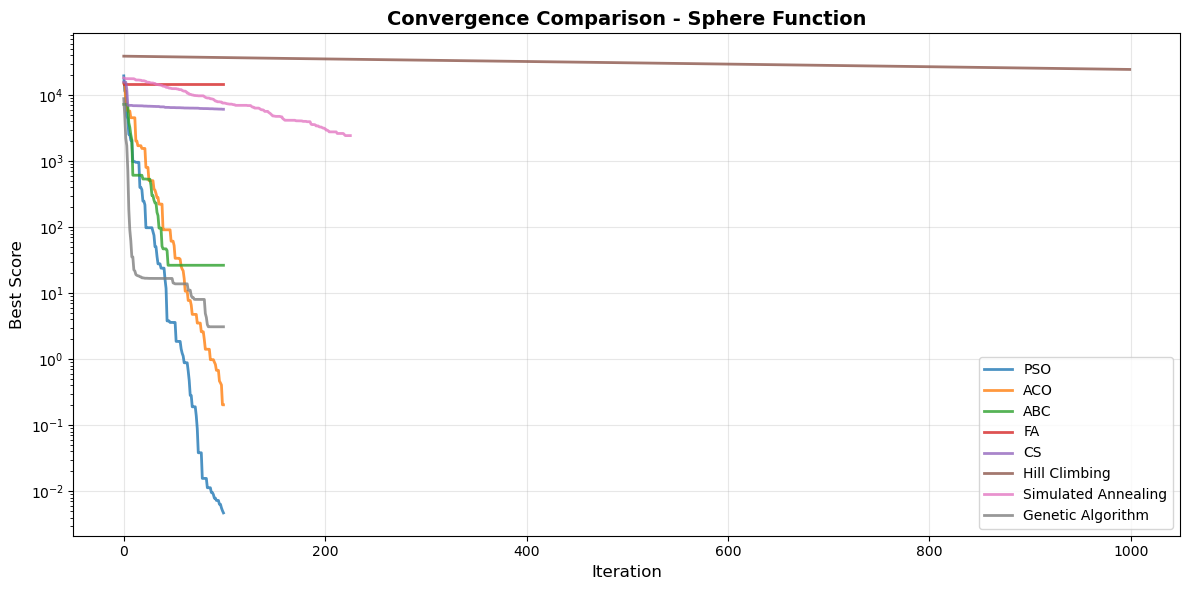

   ✓ Saved: convergence_sphere.png


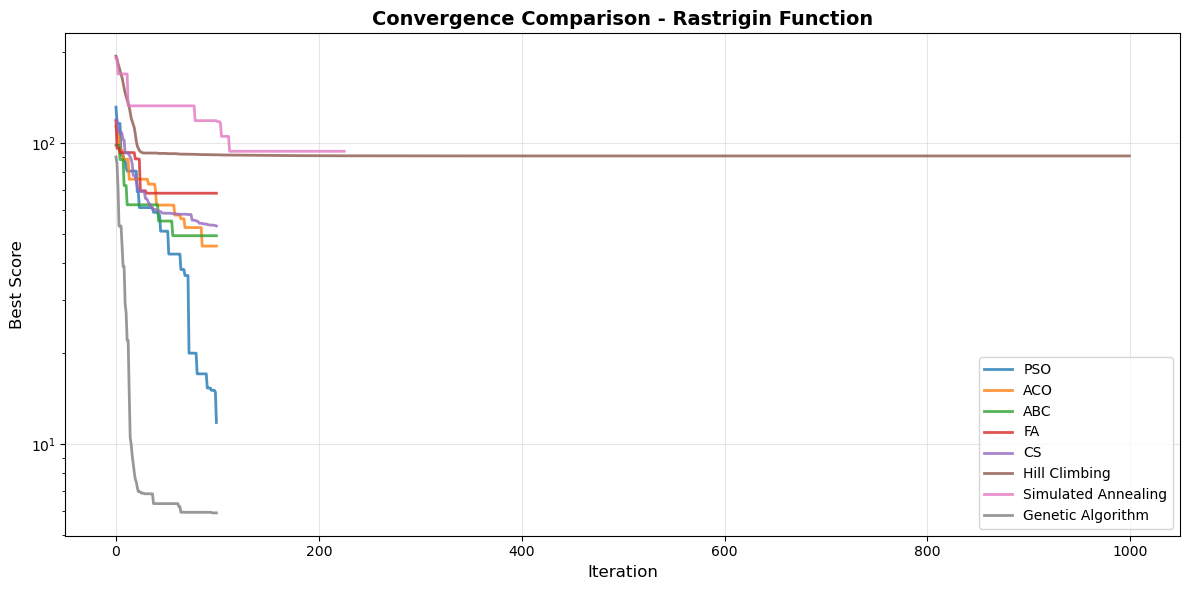

   ✓ Saved: convergence_rastrigin.png


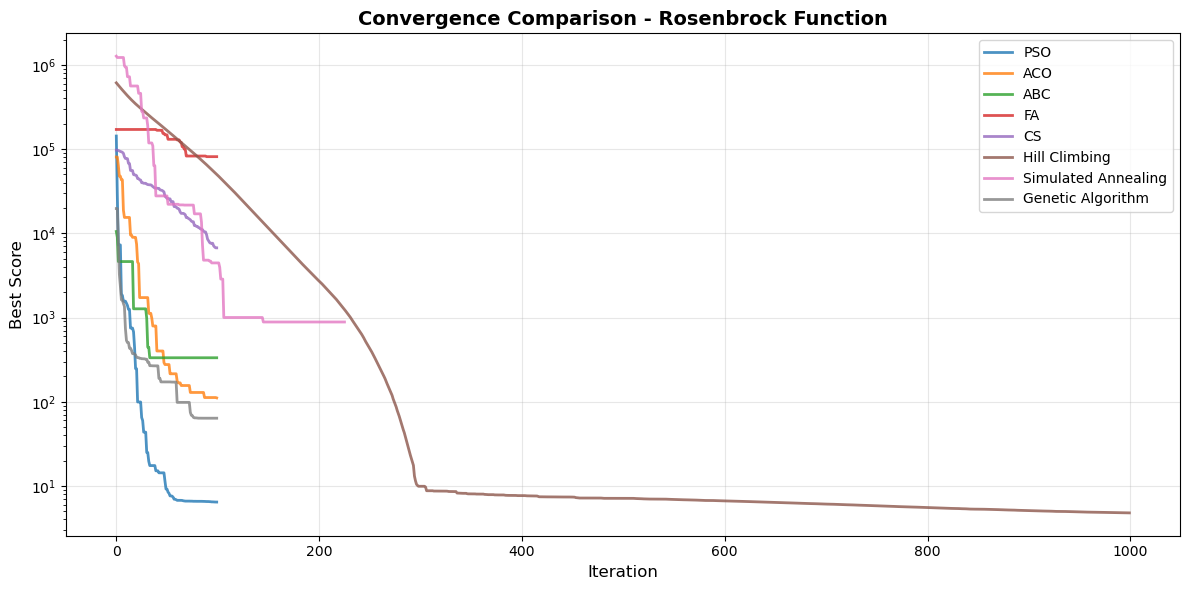

   ✓ Saved: convergence_rosenbrock.png


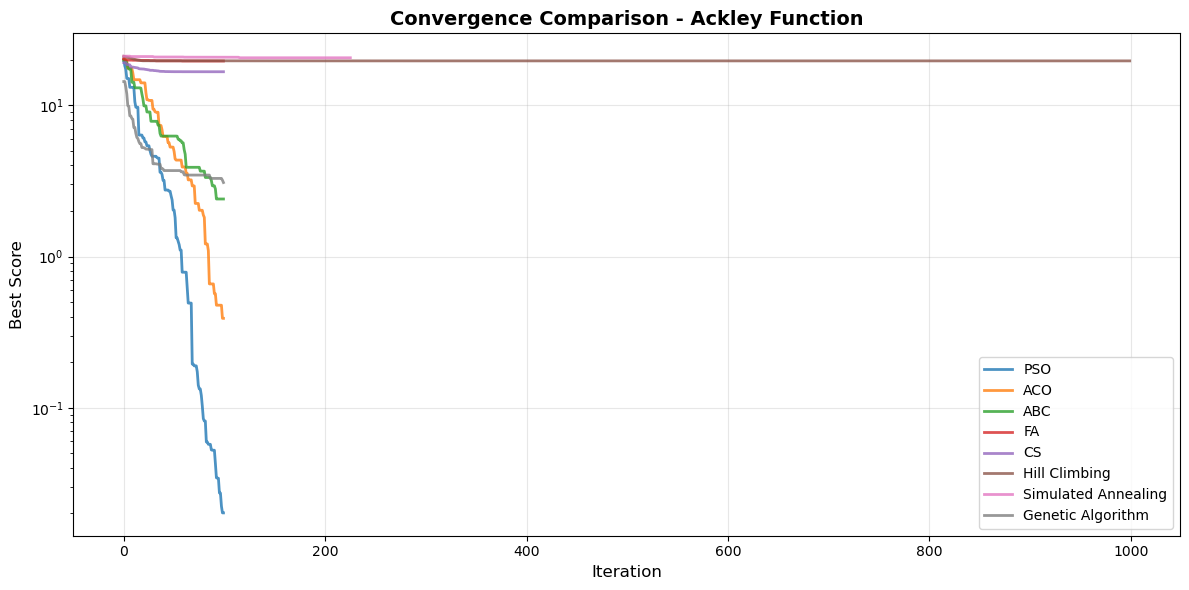

   ✓ Saved: convergence_ackley.png


In [5]:
print("\n" + "="*70)
print("TẠO VISUALIZATIONS")
print("="*70)

# Tạo thư mục để lưu plots
import os
os.makedirs('../results/plots', exist_ok=True)

# 5.1 Convergence plots cho mỗi test function
print("\n1. Convergence Plots...")
for func_name in TEST_FUNCTIONS:
    results = all_results[func_name]
    
    # Lấy histories
    histories = []
    labels = []
    for algo_name, algo_results in results.items():
        if algo_results[0]['history'] and 'best_scores' in algo_results[0]['history']:
            histories.append(algo_results[0]['history'])
            labels.append(algo_name)
    
    # Plot
    OptimizationVisualizer.plot_convergence(
        histories,
        labels,
        title=f"Convergence Comparison - {func_name.capitalize()} Function",
        log_scale=True,
        save_path=f'../results/plots/convergence_{func_name}.png'
    )
    print(f"   ✓ Saved: convergence_{func_name}.png")

plt.close('all')  # Đóng tất cả figures



2. Box Plots...


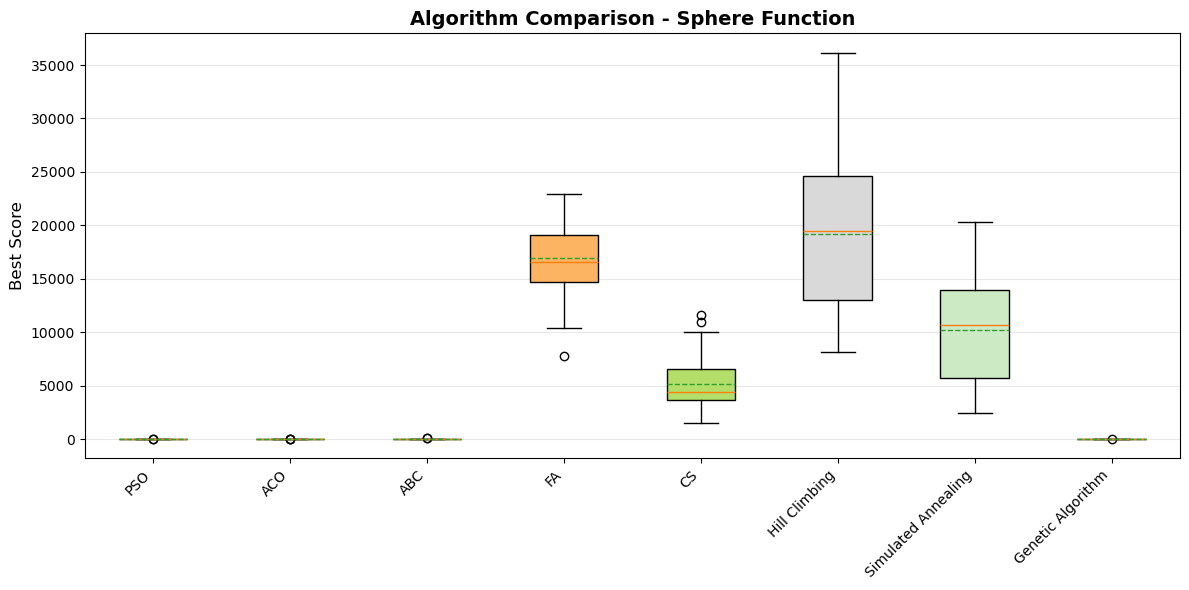

   ✓ Saved: boxplot_sphere.png


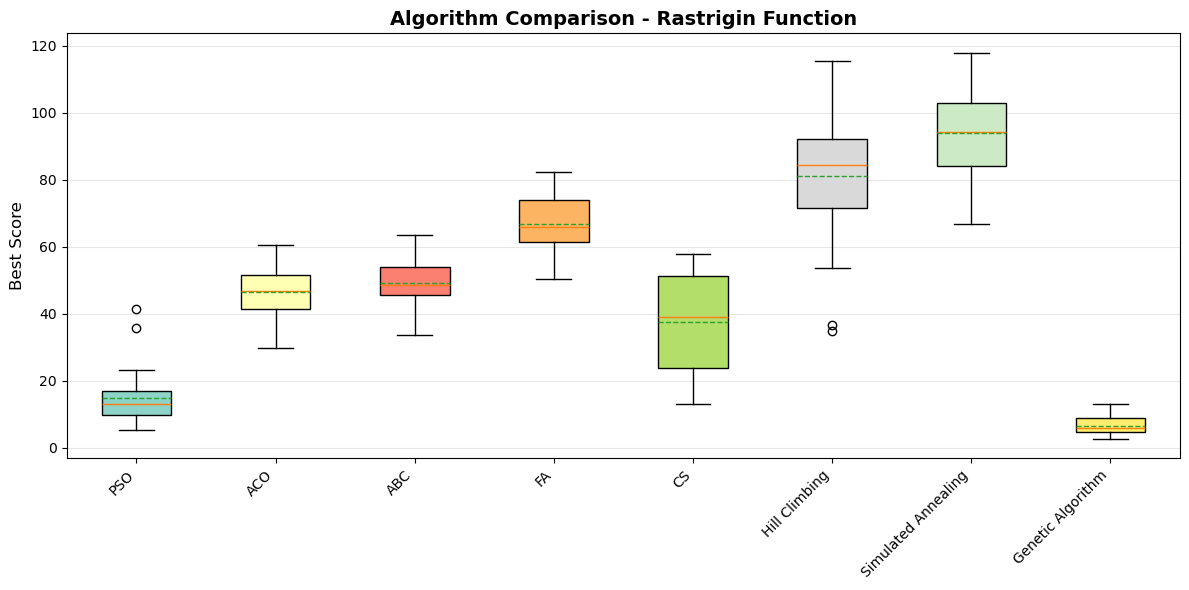

   ✓ Saved: boxplot_rastrigin.png


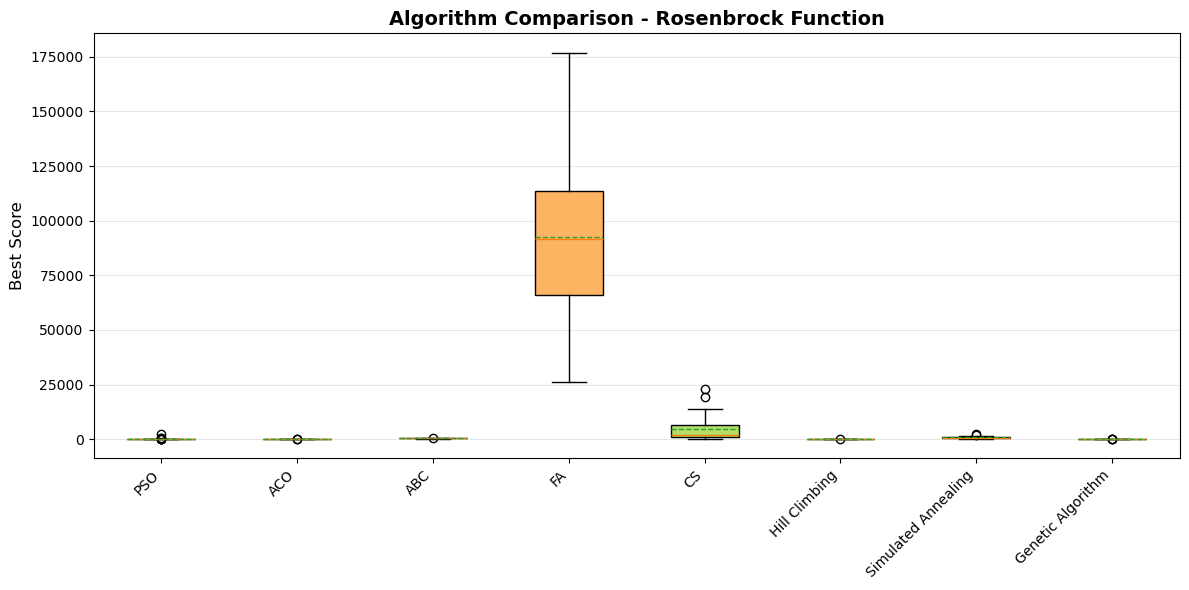

   ✓ Saved: boxplot_rosenbrock.png


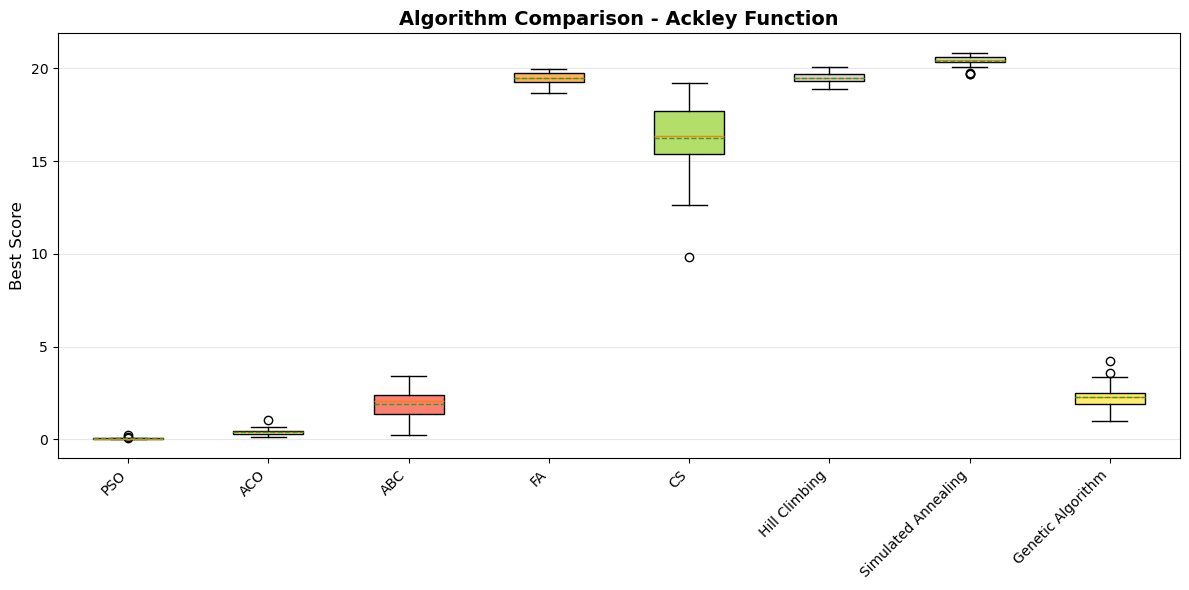

   ✓ Saved: boxplot_ackley.png


In [6]:
# 5.2 Box plots cho mỗi test function
print("\n2. Box Plots...")
for func_name in TEST_FUNCTIONS:
    results = all_results[func_name]
    
    # Prepare data
    results_dict = {
        name: [r['best_score'] for r in res]
        for name, res in results.items()
    }
    
    # Plot
    OptimizationVisualizer.plot_box_comparison(
        results_dict,
        title=f"Algorithm Comparison - {func_name.capitalize()} Function",
        ylabel="Best Score",
        save_path=f'../results/plots/boxplot_{func_name}.png'
    )
    print(f"   ✓ Saved: boxplot_{func_name}.png")

plt.close('all')



3. 3D Surface Plots...


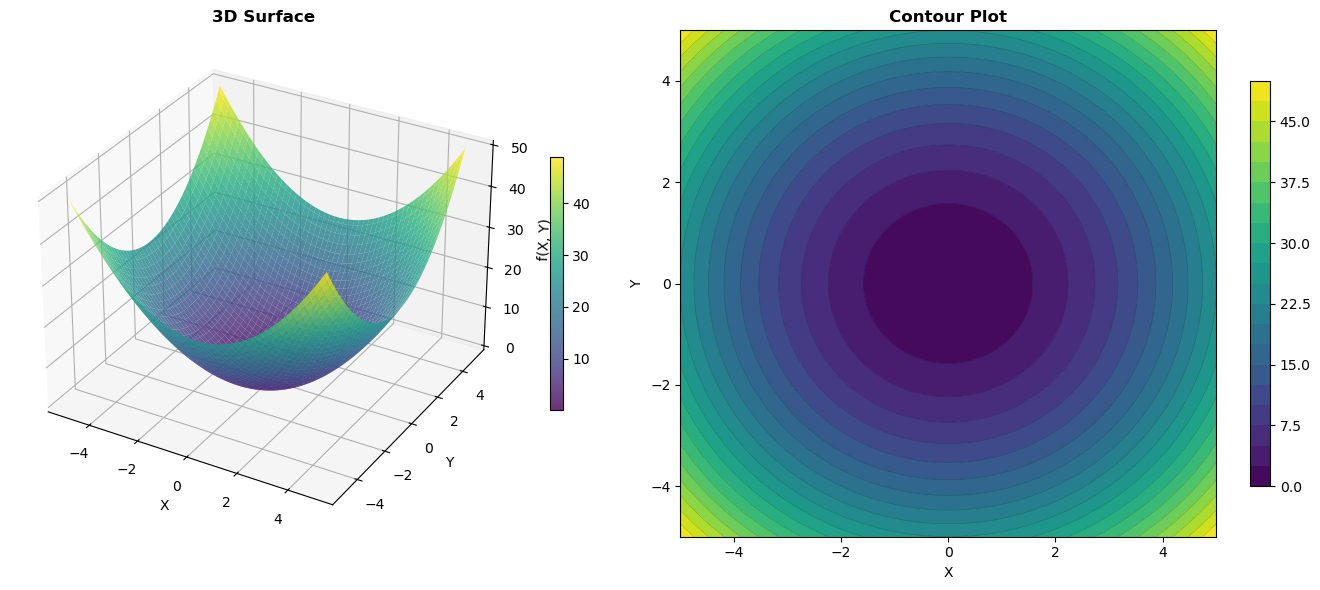

   ✓ Saved: surface_sphere.png


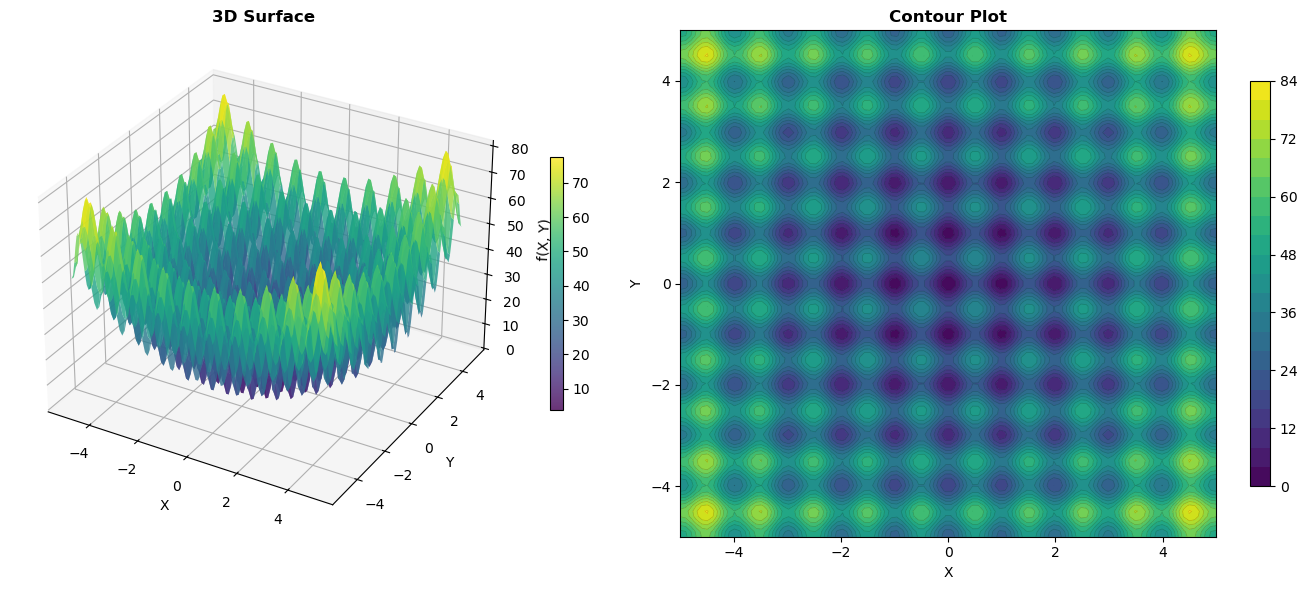

   ✓ Saved: surface_rastrigin.png


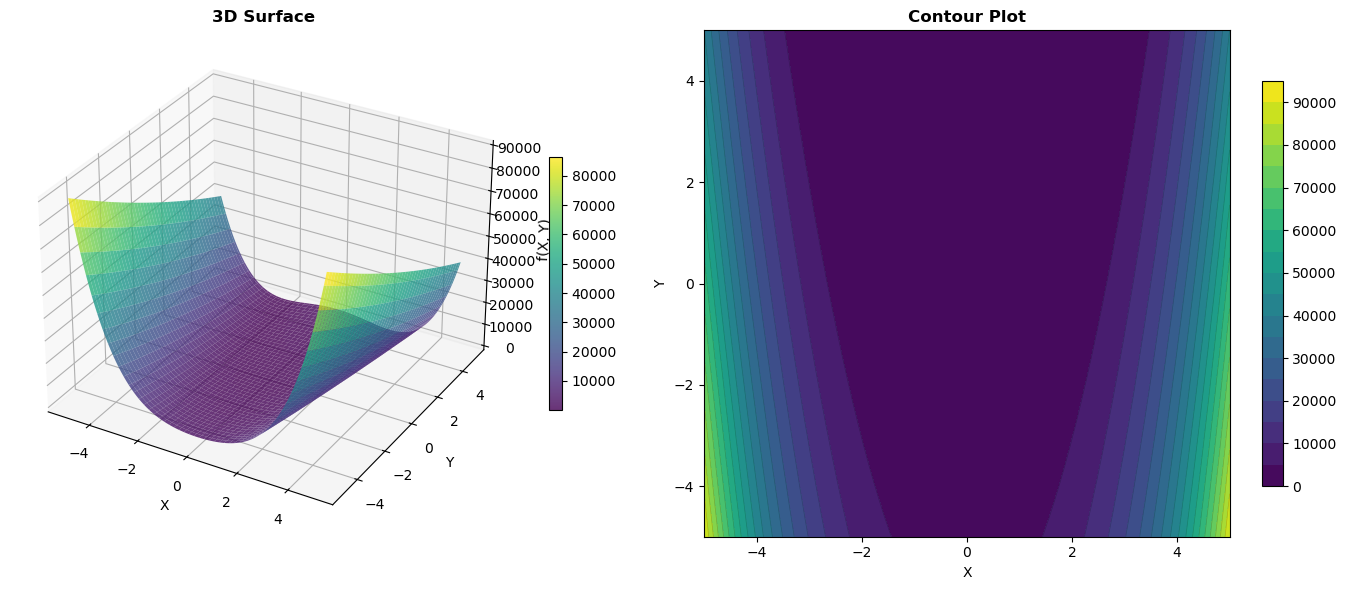

   ✓ Saved: surface_rosenbrock.png


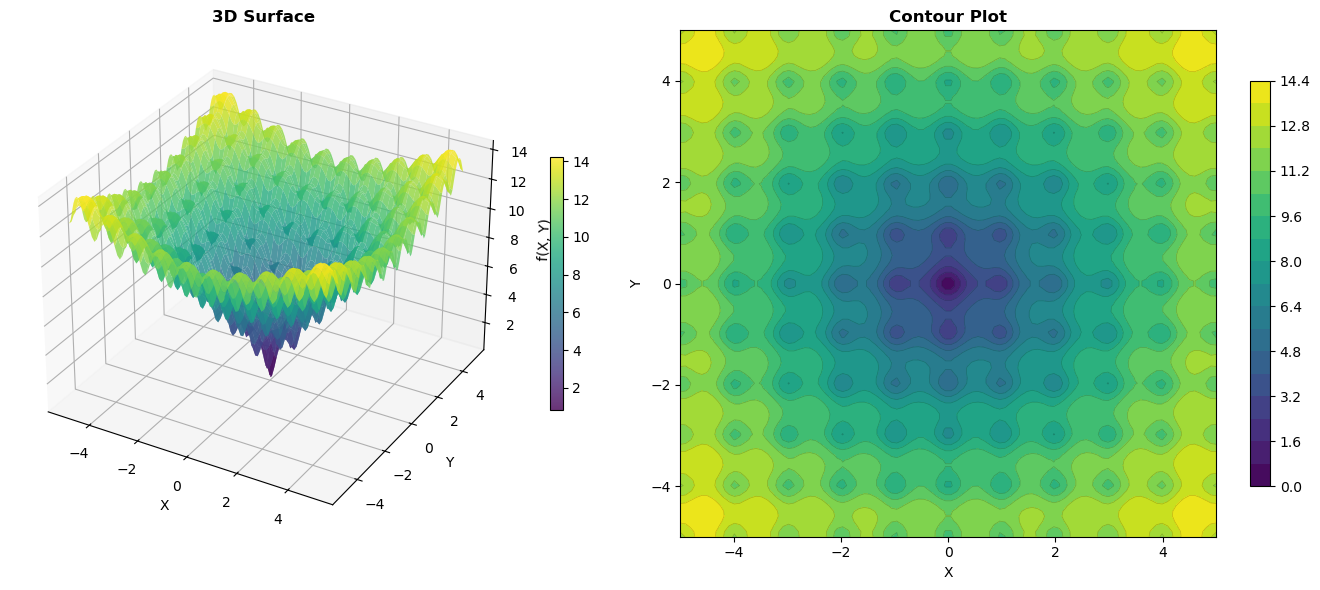

   ✓ Saved: surface_ackley.png


In [7]:
# 5.3 3D Surface plots cho test functions  
print("\n3. 3D Surface Plots...")
for func_name in TEST_FUNCTIONS:
    func_2d = get_test_function(func_name, dim=2)
    
    OptimizationVisualizer.plot_3d_surface(
        func_2d,
        x_range=(-5, 5),
        y_range=(-5, 5),
        n_points=100,
        save_path=f'../results/plots/surface_{func_name}.png'
    )
    print(f"   ✓ Saved: surface_{func_name}.png")

plt.close('all')



4. TSP Tour Visualization...


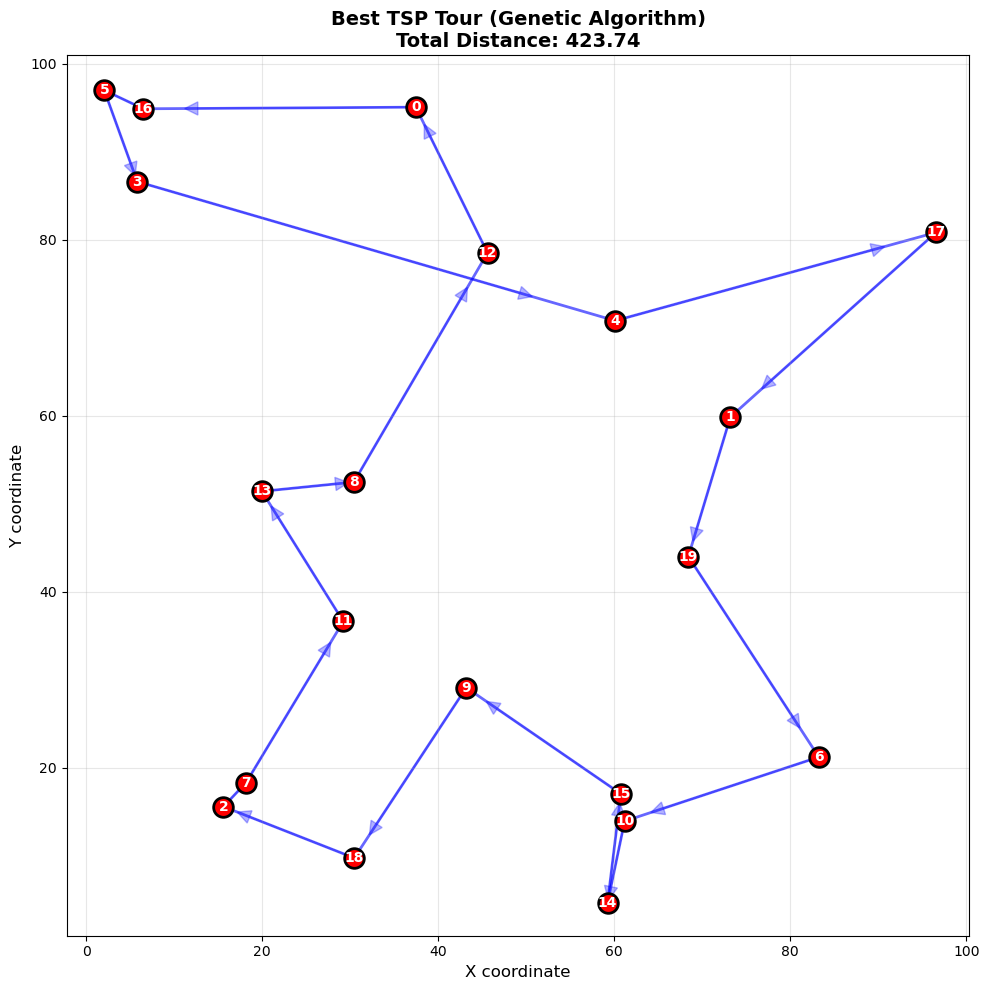

   ✓ Saved: tsp_tour.png

✓ Tất cả visualizations đã được lưu vào ../results/plots/


In [8]:
# 5.4 TSP Visualization
print("\n4. TSP Tour Visualization...")
OptimizationVisualizer.plot_tsp_tour(
    tsp,
    tsp_results['Genetic Algorithm']['tour'],
    title="Best TSP Tour (Genetic Algorithm)",
    save_path='../results/plots/tsp_tour.png'
)
print("   ✓ Saved: tsp_tour.png")

plt.close('all')

print("\n✓ Tất cả visualizations đã được lưu vào ../results/plots/")
print("="*70)


## 6. Export Results ra CSV

Lưu tất cả kết quả để dễ dàng tạo bảng trong báo cáo


In [9]:
print("\n" + "="*70)
print("EXPORT RESULTS TO CSV")
print("="*70)

# 6.1 Export continuous optimization results
all_comparison_data = []

for func_name in TEST_FUNCTIONS:
    results = all_results[func_name]
    df = AlgorithmComparison.create_comparison_table(results)
    df['Test Function'] = func_name.capitalize()
    all_comparison_data.append(df)

# Combine all results
combined_df = pd.concat(all_comparison_data, ignore_index=True)

# Reorder columns
cols = ['Test Function', 'Algorithm', 'Mean Score', 'Std Score', 'Min Score', 
        'Max Score', 'Median Score', 'Mean Time (s)', 'Std Time (s)']
combined_df = combined_df[cols]

# Save to CSV
combined_df.to_csv('../results/continuous_optimization_results.csv', index=False)
print("✓ Saved: continuous_optimization_results.csv")

# 6.2 Export TSP results
tsp_df.to_csv('../results/tsp_results.csv', index=False)
print("✓ Saved: tsp_results.csv")

# 6.3 Export detailed statistics
print("\n6.3 Export detailed statistics...")
for func_name in TEST_FUNCTIONS:
    results = all_results[func_name]
    
    # Create detailed dataframe with all trials
    detailed_data = []
    for algo_name, algo_results in results.items():
        for trial_idx, trial_result in enumerate(algo_results):
            detailed_data.append({
                'Test Function': func_name.capitalize(),
                'Algorithm': algo_name,
                'Trial': trial_idx + 1,
                'Best Score': trial_result['best_score'],
                'Time (s)': trial_result['time']
            })
    
    detailed_df = pd.DataFrame(detailed_data)
    detailed_df.to_csv(f'../results/detailed_{func_name}_results.csv', index=False)
    print(f"   ✓ Saved: detailed_{func_name}_results.csv")

print("\n✓ Tất cả kết quả đã được export to ../results/")
print("="*70)



EXPORT RESULTS TO CSV
✓ Saved: continuous_optimization_results.csv
✓ Saved: tsp_results.csv

6.3 Export detailed statistics...
   ✓ Saved: detailed_sphere_results.csv
   ✓ Saved: detailed_rastrigin_results.csv
   ✓ Saved: detailed_rosenbrock_results.csv
   ✓ Saved: detailed_ackley_results.csv

✓ Tất cả kết quả đã được export to ../results/


In [10]:
# Hiển thị bảng tổng hợp
print("\n" + "="*80)
print("BẢNG KẾT QUẢ TỔNG HỢP - CONTINUOUS OPTIMIZATION")
print("="*80)
print(combined_df.to_string(index=False))
print("="*80)



BẢNG KẾT QUẢ TỔNG HỢP - CONTINUOUS OPTIMIZATION
Test Function           Algorithm   Mean Score    Std Score    Min Score     Max Score  Median Score  Mean Time (s)  Std Time (s)
       Sphere                 PSO     0.010006     0.006837     0.001836      0.028767      0.008833       0.029787      0.011122
       Sphere                 ACO     0.274164     0.170531     0.106625      0.816204      0.223033       3.384112      0.420642
       Sphere   Genetic Algorithm     9.895806     6.986785     2.321694     31.301524      7.618753       0.151291      0.007174
       Sphere                 ABC    25.983334    18.983006     4.860262     81.357568     17.853184       0.248053      0.027600
       Sphere                  CS  5155.873313  2602.582866  1541.584754  11574.564949   4372.057147       0.116844      0.005961
       Sphere Simulated Annealing 10217.421207  4981.129888  2411.758860  20318.844516  10673.021374       0.003521      0.001405
       Sphere                  FA 16919.3

### 7.2 Xếp hạng thuật toán trên mỗi test function


In [11]:
print("\n" + "="*80)
print("XẾP HẠNG THUẬT TOÁN TRÊN MỖI TEST FUNCTION")
print("="*80)

for func_name in TEST_FUNCTIONS:
    print(f"\n{func_name.upper()}:")
    func_df = combined_df[combined_df['Test Function'] == func_name.capitalize()]
    func_df_sorted = func_df.sort_values('Mean Score')
    
    for rank, (idx, row) in enumerate(func_df_sorted.iterrows(), 1):
        print(f"  {rank}. {row['Algorithm']:25s}: {row['Mean Score']:.6e} ± {row['Std Score']:.6e}")

print("="*80)



XẾP HẠNG THUẬT TOÁN TRÊN MỖI TEST FUNCTION

SPHERE:
  1. PSO                      : 1.000585e-02 ± 6.837225e-03
  2. ACO                      : 2.741640e-01 ± 1.705310e-01
  3. Genetic Algorithm        : 9.895806e+00 ± 6.986785e+00
  4. ABC                      : 2.598333e+01 ± 1.898301e+01
  5. CS                       : 5.155873e+03 ± 2.602583e+03
  6. Simulated Annealing      : 1.021742e+04 ± 4.981130e+03
  7. FA                       : 1.691940e+04 ± 3.435291e+03
  8. Hill Climbing            : 1.923353e+04 ± 6.962640e+03

RASTRIGIN:
  1. Genetic Algorithm        : 6.639396e+00 ± 2.625321e+00
  2. PSO                      : 1.486683e+01 ± 7.858867e+00
  3. CS                       : 3.745479e+01 ± 1.415956e+01
  4. ACO                      : 4.667907e+01 ± 7.246659e+00
  5. ABC                      : 4.933528e+01 ± 6.786363e+00
  6. FA                       : 6.675296e+01 ± 8.098705e+00
  7. Hill Climbing            : 8.112180e+01 ± 2.026988e+01
  8. Simulated Annealing      : 9.3

### 7.3 Phân tích thống kê chi tiết


In [12]:
# Tính các metrics bổ sung
print("\n" + "="*80)
print("PHÂN TÍCH THỐNG KÊ CHI TIẾT")
print("="*80)

for func_name in TEST_FUNCTIONS:
    print(f"\n{func_name.upper()} Function:")
    results = all_results[func_name]
    
    for algo_name, algo_results in results.items():
        # Tính robustness (CV)
        cv = AlgorithmComparison.robustness_metric(algo_results)
        
        # Tính success rate (nếu có target)
        func_obj = get_test_function(func_name, dim=CONFIG['dim'])
        sr = AlgorithmComparison.success_rate(
            algo_results, 
            target_score=func_obj.global_optimum,
            tolerance=0.01
        )
        
        print(f"\n  {algo_name}:")
        print(f"    Robustness (CV): {cv:.4f}")
        print(f"    Success Rate: {sr:.1f}%")
        
print("="*80)



PHÂN TÍCH THỐNG KÊ CHI TIẾT

SPHERE Function:

  PSO:
    Robustness (CV): 0.6833
    Success Rate: 63.3%

  ACO:
    Robustness (CV): 0.6220
    Success Rate: 0.0%

  ABC:
    Robustness (CV): 0.7306
    Success Rate: 0.0%

  FA:
    Robustness (CV): 0.2030
    Success Rate: 0.0%

  CS:
    Robustness (CV): 0.5048
    Success Rate: 0.0%

  Hill Climbing:
    Robustness (CV): 0.3620
    Success Rate: 0.0%

  Simulated Annealing:
    Robustness (CV): 0.4875
    Success Rate: 0.0%

  Genetic Algorithm:
    Robustness (CV): 0.7060
    Success Rate: 0.0%

RASTRIGIN Function:

  PSO:
    Robustness (CV): 0.5286
    Success Rate: 0.0%

  ACO:
    Robustness (CV): 0.1552
    Success Rate: 0.0%

  ABC:
    Robustness (CV): 0.1376
    Success Rate: 0.0%

  FA:
    Robustness (CV): 0.1213
    Success Rate: 0.0%

  CS:
    Robustness (CV): 0.3780
    Success Rate: 0.0%

  Hill Climbing:
    Robustness (CV): 0.2499
    Success Rate: 0.0%

  Simulated Annealing:
    Robustness (CV): 0.1326
    Suc

## 8. Kết luận

### Tóm tắt kết quả experiments


In [13]:
print("\n" + "="*80)
print("KẾT LUẬN")
print("="*80)

print("\n✅ ĐÃ HOÀN THÀNH:")
print(f"  - Test {len(TEST_FUNCTIONS)} hàm continuous optimization")
print(f"  - Test {len(algorithms)} thuật toán")
print(f"  - Mỗi cấu hình chạy {CONFIG['n_trials']} trials")
print(f"  - Test TSP với {CONFIG['n_cities_tsp']} thành phố")
print(f"  - Tạo {len(TEST_FUNCTIONS) * 3 + 1} visualizations")
print(f"  - Export {len(TEST_FUNCTIONS) + 2} CSV files")

print("\n📊 KẾT QUẢ CHÍNH:")
print("\n1. CONTINUOUS OPTIMIZATION:")

# Tìm thuật toán tốt nhất cho mỗi function
for func_name in TEST_FUNCTIONS:
    func_df = combined_df[combined_df['Test Function'] == func_name.capitalize()]
    best_algo = func_df.loc[func_df['Mean Score'].idxmin()]
    print(f"   {func_name.capitalize():15s}: {best_algo['Algorithm']} (Mean: {best_algo['Mean Score']:.6e})")

print("\n2. TSP (DISCRETE OPTIMIZATION):")
print(f"   Best method: Genetic Algorithm ({ga_distance:.2f})")
print(f"   Improvement over baseline: {improvement_ga:.1f}%")

print("\n📁 OUTPUT FILES:")
print("   Kết quả: ../results/continuous_optimization_results.csv")
print("   TSP: ../results/tsp_results.csv")
print("   Plots: ../results/plots/ (16 files)")
print("   Detailed results: ../results/detailed_*.csv")

print("\n📝 SẴN SÀNG VIẾT BÁO CÁO!")
print("   - Tất cả số liệu đã có trong CSV files")
print("   - Tất cả plots đã được lưu")
print("   - Copy-paste vào report template")

print("\n" + "="*80)
print("✓✓✓ EXPERIMENTS HOÀN TẤT ✓✓✓")
print("="*80)



KẾT LUẬN

✅ ĐÃ HOÀN THÀNH:
  - Test 4 hàm continuous optimization
  - Test 8 thuật toán
  - Mỗi cấu hình chạy 30 trials
  - Test TSP với 20 thành phố
  - Tạo 13 visualizations
  - Export 6 CSV files

📊 KẾT QUẢ CHÍNH:

1. CONTINUOUS OPTIMIZATION:
   Sphere         : PSO (Mean: 1.000585e-02)
   Rastrigin      : Genetic Algorithm (Mean: 6.639396e+00)
   Rosenbrock     : ACO (Mean: 1.896083e+01)
   Ackley         : PSO (Mean: 5.663883e-02)

2. TSP (DISCRETE OPTIMIZATION):
   Best method: Genetic Algorithm (423.74)
   Improvement over baseline: 8.9%

📁 OUTPUT FILES:
   Kết quả: ../results/continuous_optimization_results.csv
   TSP: ../results/tsp_results.csv
   Plots: ../results/plots/ (16 files)
   Detailed results: ../results/detailed_*.csv

📝 SẴN SÀNG VIẾT BÁO CÁO!
   - Tất cả số liệu đã có trong CSV files
   - Tất cả plots đã được lưu
   - Copy-paste vào report template

✓✓✓ EXPERIMENTS HOÀN TẤT ✓✓✓
